# Deep Learning - Basic Neural Network
A neural network is a computer system that tries to work like the human brain. It is used in deep learning to help machines learn from data — like recognizing images, understanding speech, or making predictions.

### A basic neural network has:

- Input layer – This is where the data goes in (like an image or number).
- Hidden layer(s) – These layers do the thinking. They find patterns and features in the data.
- Output layer – This gives the final result (like “cat” or “dog” if it's an image classifier).

### How It Works (Step by Step)

- Input: You give it some data (for example, a number or a picture).
- Processing: It multiplies the data by some numbers (called weights) and adds others (called biases).
- Activation: It passes the result through a formula (like the sigmoid function) to decide what to do next.
- Output: It gives you an answer based on what it learned.

### Goal of a Neural Network

The goal is to learn from data by adjusting the weights and biases so it gets better over time. It learns by checking if it made a mistake and correcting it — this is called training.

In [486]:
# Importing Necessary Libraries (Only using Scikit-Learn)
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# This one will help us with making neural network - Multiple Layer Perceptron
from sklearn.neural_network import MLPClassifier


In [487]:
# Reading Dataset
df = load_digits()
df

# Data is in the form of key value pair, data and target
# It's the image pixels data.


{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

## Selecting Features And Targets

In [488]:
# Selecting features as x
x = df.data
x


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [489]:
x.shape

(1797, 64)

In [490]:
# Selecting target as y
y= df.target
y


array([0, 1, 2, ..., 8, 9, 8])

In [491]:
y.shape


(1797,)

## Visualization Of Image

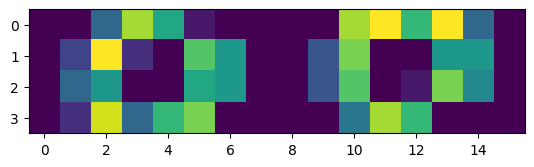

In [492]:
# It shows a picture of the first row of data from a dataset
# plt.imshow(...): Displays that 4×16 grid as an image using colors to represent the numbers.
# 64 pixels will be turned into an 4×16 image and will be ahown on the screen.

plt.imshow(x[0].reshape(4, 16))


## Feature Scaling

In [493]:
# We will do standard scaling because one column values might be greater than the other columns.
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled


array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

## Splitting Dataset( Test and Train )

In [494]:
# Splitting Data into test and train
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.2, random_state= 42)


## Building Neural Network

In [495]:
# Building a neural network
# (50,) → 1 hidden layer with 50 neurons
# activation = relu, activation function,  helps the network add non-linearity (so it can learn complex things).
# If input > 0 → keep it, If input < 0 → make it 0.
# solver = 'adam', optimizer for gradient
mlp = MLPClassifier(hidden_layer_sizes= (50, ),
                    activation = 'relu',
                    solver = 'adam', max_iter = 300,
                    random_state= 42)


## Training Model

In [496]:
# Training the model
mlp.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(50,), max_iter=300, random_state=42)

## Prediction


In [497]:
# Predicting the model
y_pred = mlp.predict(X_test)


## Evaluation

In [498]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)


In [499]:
# Printing
print(f"Accuracy: {accuracy:2f}")

# We can improve this accuracy

Accuracy: 0.903338


## Accuracy for Other Classifiers

In [500]:
# Importing necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [501]:
# Accuracy for KNN
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print(f"Accuracy for KNN: {accuracy_knn:2f}")

# Accuracy for Decision Tree
decision = DecisionTreeClassifier(random_state = 42)
decision.fit(X_train, y_train)
y_pred = decision.predict(X_test)
accuracy_decision = accuracy_score(y_test, y_pred)
print(f"Accuracy for Decision Tree: {accuracy_decision:2f}")

# Accuracy for Random Forest Tree
random = RandomForestClassifier(random_state = 42)
random.fit(X_train, y_train)
y_pred = random.predict(X_test)
accuracy_random = accuracy_score(y_test, y_pred)
print(f"Accuracy for Random Forest Tree: {accuracy_random:2f}")


Accuracy for KNN: 0.956885
Accuracy for Decision Tree: 0.750348
Accuracy for Random Forest Tree: 0.936022
